## Introduction to the Dataset

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile).

In [1]:
import pandas as pd

cars = pd.read_csv('imports-85.data', header = None)
cars.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
cols = ['symboling', 'normalized_losses', 'make', 'fuel_type',
        'aspiration', 'num_doors', 'body_style', 'drive_wheels',
        'engine_location', 'wheel_base', 'length', 'width', 'height',
        'curb_weight', 'engine_type', 'num_cylinders', 'engine_size',
        'fuel_system', 'bore','stroke', 'compression_ratio', 'horsepower', 
        'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
len(cols)

26

In [3]:
cars.columns = cols
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [5]:
# continous columns were selected 
numeric_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
                'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
numeric_cars = cars[numeric_cols]
numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

We usually can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the `normalized_losses` column contains missing values represented using "?". Let's replace these values and look for the presence of missing values in other numeric columns. Let's also rescale the values in the numeric columns so they all range from `0` to `1`.

In [6]:
import numpy as np
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
numeric_cars.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [8]:
numeric_cars.shape

(205, 14)

In [9]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.dtypes

normalized_losses    float64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight          float64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg             float64
highway_mpg          float64
price                float64
dtype: object

In [10]:
numeric_cars.dropna(subset = ['price'], inplace = True)
print(numeric_cars.shape)
numeric_cars.isnull().sum()

(201, 14)


normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [11]:
numeric_cars.fillna(numeric_cars.mean(), inplace = True)
print(numeric_cars.shape)
numeric_cars.isnull().sum()

(201, 14)


normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [12]:
numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [13]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [14]:
print(numeric_cars.shape)
numeric_cars.isnull().sum()

(201, 14)


normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

## Univariate Model

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
def k_train_test(feature, target, dataset):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Shuffle the index and reindex for randomization
    shuffled = np.random.permutation(dataset.index)
    shuffled_df = dataset.reindex(shuffled)
    
    #Row to split the train & test datasets on
    split_row = int(len(shuffled_df) / 2)
    
    #Train & test dataset split in half
    train = shuffled_df.iloc[0:split_row]
    test = shuffled_df.iloc[split_row:]
    
    knn.fit(train[[feature]], train[target])
    predictions = knn.predict(test[[feature]])
    
    rmse = (mean_squared_error(test[target], predictions)) ** 0.5
    
    return rmse

In [16]:
feature_cols = numeric_cars.columns.drop('price')
feature_cols

Index(['normalized_losses', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'bore', 'stroke', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg'],
      dtype='object')

In [17]:
rmses = {}
for f_col in feature_cols:
    rmse = k_train_test(f_col, 'price', numeric_cars)
    rmses[f_col] = rmse

rmse_series = pd.Series(rmses)
rmse_series.sort_values()

horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_ratio    6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [18]:
# updated k_train_test

def k_train_test(feature, target, dataset):
    np.random.seed(1)
    
    # Shuffle the index and reindex for randomization
    shuffled = np.random.permutation(dataset.index)
    shuffled_df = dataset.reindex(shuffled)
    
    #Row to split the train & test datasets on
    split_row = int(len(shuffled_df) / 2)
    
    #Train & test dataset split in half
    train = shuffled_df.iloc[0:split_row]
    test = shuffled_df.iloc[split_row:]
    
    k_values = [1, 3, 5, 7, 9]
    rmse_dict = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train[[feature]], train[target])
        predictions = knn.predict(test[[feature]])
    
        rmse = (mean_squared_error(test[target], predictions)) ** 0.5
        rmse_dict[k] = rmse
    return rmse_dict

In [19]:
rmses = {}
for f_col in feature_cols:
    rmse = k_train_test(f_col, 'price', numeric_cars)
    rmses[f_col] = rmse

rmses

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city_mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression_ratio': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb_weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway_mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
 

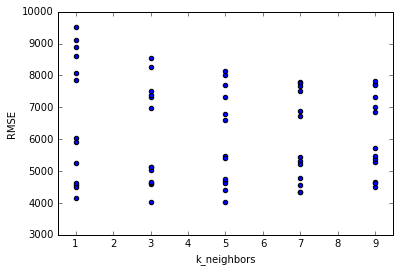

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

for key, value in rmses.items():
    x = list(value.keys())
    y = list(value.values())
    
    plt.scatter(x, y)
    plt.xlabel('k_neighbors')
    plt.ylabel('RMSE')
    plt.xticks(np.arange(1,10))

## Multivariate Model


In [43]:
# updated k_train_test for multiple features

def k_train_test(features, target, dataset):
    np.random.seed(1)
    
    # Shuffle the index and reindex for randomization
    shuffled = np.random.permutation(dataset.index)
    shuffled_df = dataset.reindex(shuffled)
    
    #Row to split the train & test datasets on
    split_row = int(len(shuffled_df) / 2)
    
    #Train & test dataset split in half
    train = shuffled_df.iloc[0:split_row]
    test = shuffled_df.iloc[split_row:]
    
    k_values = [1]
    rmse_dict = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train[features], train[target])
        predictions = knn.predict(test[features])
    
        rmse = (mean_squared_error(test[target], predictions)) ** 0.5
        rmse_dict[k] = rmse
    return rmse_dict

In [44]:
all_features = rmse_series.sort_values().index.tolist()
two_best_features = all_features[:2]
three_best_features = all_features[:3]
four_best_features = all_features[:4]
five_best_features = all_features[:5]

features_dict = {'all_features' : all_features,
                'two_best_features' : two_best_features,
                'three_best_features' : three_best_features,
                'four_best_features' : four_best_features,
                'five_best_features' : five_best_features
               }

In [46]:
features_rmses = {}
for key, value in features_dict.items():
    rmses = k_train_test(value, 'price', numeric_cars)
    features_rmses[key] = rmses
    
features_rmses

{'all_features': {1: 3259.5051346442574},
 'five_best_features': {1: 2530.0554077602005},
 'four_best_features': {1: 2600.746383728188},
 'three_best_features': {1: 2777.396403500627},
 'two_best_features': {1: 2790.1071433346656}}

## Hyperparameter Tuning


In [48]:
# updated k_train_test for multiple features & k neighbors from 1 - 25

def k_train_test(features, target, dataset):
    np.random.seed(1)
    
    # Shuffle the index and reindex for randomization
    shuffled = np.random.permutation(dataset.index)
    shuffled_df = dataset.reindex(shuffled)
    
    #Row to split the train & test datasets on
    split_row = int(len(shuffled_df) / 2)
    
    #Train & test dataset split in half
    train = shuffled_df.iloc[0:split_row]
    test = shuffled_df.iloc[split_row:]
    
    k_values = list(range(1,26))
    rmse_dict = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train[features], train[target])
        predictions = knn.predict(test[features])
    
        rmse = (mean_squared_error(test[target], predictions)) ** 0.5
        rmse_dict[k] = rmse
    return rmse_dict

In [51]:
features_rmses = {}
for key, value in features_dict.items():
    rmses = k_train_test(value, 'price', numeric_cars)
    features_rmses[key] = rmses
    
features_rmses

{'all_features': {1: 3259.5051346442574,
  2: 3418.6985324741045,
  3: 3529.5677482588367,
  4: 4061.1730884019703,
  5: 4163.854606177567,
  6: 4199.044536567457,
  7: 4458.660757543543,
  8: 4403.775344761437,
  9: 4384.485671695709,
  10: 4466.96857440843,
  11: 4629.038498508015,
  12: 4713.725507070745,
  13: 4717.313766827757,
  14: 4792.281612493692,
  15: 4846.150055774202,
  16: 4926.180525609332,
  17: 4917.333072568479,
  18: 4938.441513667439,
  19: 4962.612616553981,
  20: 4979.086527754497,
  21: 4956.335601091478,
  22: 4969.916397940328,
  23: 5001.624512711541,
  24: 5056.3840618050845,
  25: 5126.939162683078},
 'five_best_features': {1: 2530.0554077602005,
  2: 2897.1757974767684,
  3: 3183.4597426217424,
  4: 3168.0230415758415,
  5: 3341.6024539726504,
  6: 3537.520542998191,
  7: 3817.290452118825,
  8: 4004.414529685573,
  9: 3992.3186041830318,
  10: 4138.728787853335,
  11: 4342.052852829098,
  12: 4416.145381031136,
  13: 4493.8798141857205,
  14: 4463.5016015

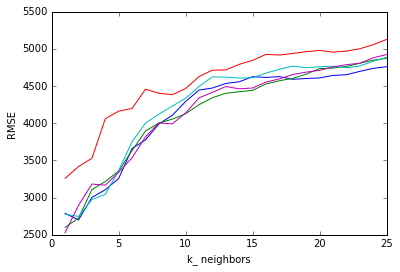

In [52]:
for k,v in features_rmses.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x, y)
    plt.xlabel('k_ neighbors')
    plt.ylabel('RMSE')

According to the graph above, it seems using a low value k neighbors gives us the lowest RMSE.